# Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? 
# This hotel booking dataset can help you explore those questions! This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.
**Explore and analyze the data to discover important factors that govern the bookings.**

Tourism is a thriving industry. In today's world people are willing to spend more and more to explore places and get unique experiences.

One closely related industry is "__Hotel Industry__". Hotels majorly depend on vacation travellers and business travellers.

The prices in a hotel may vary based on the time of the year, demand, length of stay, number of occupants, etc.

What if we could guess the best time or duration to book a hotel room at **cheapest rates**???

What if hoteliers could guess when the demands for their hotels are likely to increase and when the demands would be low??? They could optimize their funds so much better.

## Let's dive into this data to see how many questions can we answer.

In [7]:
#Importing Data and macro analysis of the dataframe
#Importing libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [8]:
#importing csv file

df = pd.read_csv(r'Hotel_Bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Theres a lot of information in this data ,lets see what types of data does it contains !!!

In [9]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [11]:
# Let's check the number of rows and columns in the dataset

df.shape

(119390, 32)

In [12]:
#Let's check the data type of each column

df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

## STEP-1 - ASSUMPTIONS

### Let's go one by one through each column

**1. Hotel** - This contains the type of Hotel, 'City' or 'Resort'. The type of hotel is expeccted to be a major determinant of price. Moreover, probability of cancellation of booking is expected to be higher in 'City Hotel' as compared to a 'Resort' because 'Resort' bookings are generally planned holidays, which a person is highly unlikely to cancel except for urgent and un-foreseen circumstances.

**2. is_cancelled** - This contains the data regarding, whether or not a booking was cancelled. This is more like a dependent variable that needs to be predicted. However, the purview of current Project does not include Predictions

**3. lead_time** - It is not very clear what this column depicts

**4. arrival_date_year** - Year of visit. In normal circumstances, tourism industry has a business cycle of 1 year, i.e., trend of tourists may vary within an year, but the cycle resets every year. The number of tourists is expected to gradually increase over the years

**5. arrival_date_month** - Month of visit. Every place has a peak season. The demand for hotels is expected to be high in the months when the weather is favourable. And low in the months when the weather is not favourable.

**6. arrival_date_week_number** - Week of the year when the tourist had visited. This is redundant data as month and date are already given. After analysing this column, it may be dropped.

**7. arrival_date_day_of_month** - The date on which the traveller had travelled. This may or may not have relevance. However, it is safe to assume that people may go on a trip in the beginning of the month when they have received their salaries.

**8. stays_in_weekend_nights** - Number of weekend nights stayed. People are expected to prefer weekends over weekdays for a trip.

**9. stays_in_week_nights** - Number of weekday nights stayed. People are expected to NOT prefer weekdays for a trip.

**10. adults** - Number of adults saying. Single adult is expected to be on a business trip. 2 or more adults in a room are most likely friends or families.

**11. childern** - Number of children staying. A room booked with children is definitely a family trip.

**12. babies** - Segregation between children and babies is not given. If the column will be highly imbalanced, it will be safe to delete it.

**13. meal** - Meal booked or not-booked is not expected to have an impact on cancellation. However, it may define the type of visit the person is planning. No-breakfast may mean that th eperson is planning an early morning extrusion. Breakfast plan may mean a normal touristy plan. Whereas, all meals indicate that the person is planning a peaceful stay at the hotel and the hotel can treat the person accordingly.

**14. country** - It is not very clear whether it is talking about the country of hotel or country of the traveller. We may assume thta the column represents country of the hotel. And needless to say, country determines the price of a hotel.

**15. market_segment** - It is not very explicit, but market segment may include the kind of traveller. Deeper study of the column may reveal new facts

**16. distribution_channel** - It is not very explicit, but distribution channel may include the source of booking. Deeper study of the column may reveal new facts

**17. is_repeated_guest** - A repeated guest deserves better treatment and more offers. He is also likely to recommend the hotel to other people. Hence, this person is like a paying advertisement for the hotel and definitely deserves better treatment than the other travellers

**18. previous_cancellations** - A person who has cancelled booking in the past has higher chances of cancelling this time as well.

**19. previous_bookings_not_canceled** - There seems to be multi-collinearity here. is_repeated_guest and this column seems to be depicting the same thing. We will explore more and decide whether to keep this column or not.

**20. reserved_room_type** - The room type is a key indicator of price. While suggesting rooms to a traveler, the budget can be ascertained before offering him a room.

**21. assigned_room_type** - Sometimes, hotels upgrade your room type depending on the availability. Such gestures are always welcomed by the guests. A relation between reserved room and assigned room can be used by a traveller while booking a hotel

**22. booking_changes** - Number of times a booking was modified. Higher number of modifications reveal unstable or non definite plan of the traveller and may directly impact cancellation.

**23. deposit_type** - A traveller who has paid a deposit is highly unlikely to cancel the booking.

**24. agent** - This column seem to have NaN values. Other values are numbers which don't have a very clear meaning

**25. company** - This column also has NaN values. A deeper delve into the column may reveal its features

**26. days_in_waitingg_list** - A person who had a long number of days in waiting list is more likely to cancel his booking.

**27. customer_type** - Contents of the column are not very clear. A deeper delve into the column may reveal its features.

**28. adr** - Contents of the column are not very clear. A deeper delve into the column may reveal its features.

**29. required_car_parking_spaces** - A traveller requiring car_parking is probably travelling from nearby places. In case no advance payment is made, the booking is likely to be cancelled. On the other hand, if we see from the customer's perspective, the hotel that offers car parking space is likely to charge higher

**30. total_of_special_requests** - A customer with multiple special requests may be a demanding customer and the hotel must be prepared accordingly. Moreover, multiple special requests may invite higher charges

**31. reservation_status** - This column is more like a dependent variable which we need to predict. However, in this project we don't have to predict anything. this column may be used for ascertaining our assumptions

**32 - reservation_status_date** - The date when the status was updated. This column might not have any impact on our model and hence may be dropped.

## STEP-2 - Univariate Analysis

### Let's first analyse the target variable

In [17]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

<AxesSubplot:>

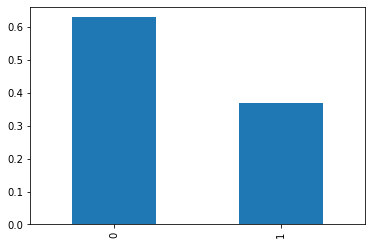

In [22]:
df['is_canceled'].value_counts(normalize = True).plot.bar()

In [18]:
# Ratio of not-canceled bookings to canceled bookings

df['is_canceled'].value_counts(normalize = True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

## Univariate Ananlysis for Categorical variables

### hotel

In [19]:
# Let's check the unique types of hotels in our dataset

df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

<AxesSubplot:>

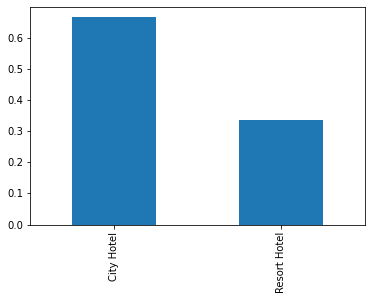

In [20]:
# Distribution of resort hotel and City Hotels

df['hotel'].value_counts(normalize = True).plot.bar()

### is_cancelled

In [25]:
# Let's cheque the unique values in this column

df['is_canceled'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:>

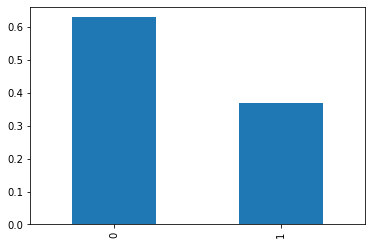

In [26]:
# Ratio of canceled and not canceled bookings

df['is_canceled'].value_counts(normalize = True).plot.bar()

### meal

In [27]:
# unique types of meal plans

df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

<AxesSubplot:>

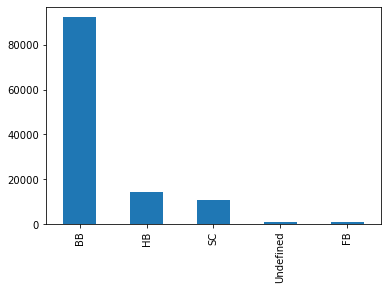

In [28]:
# distribution of number of bookings with different meal plans

df['meal'].value_counts().plot.bar()

### country

In [29]:
# Let's check the list of all the countries in our dataset

df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

### market_segement

In [30]:
# Let's check the different market_segments

df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

<AxesSubplot:>

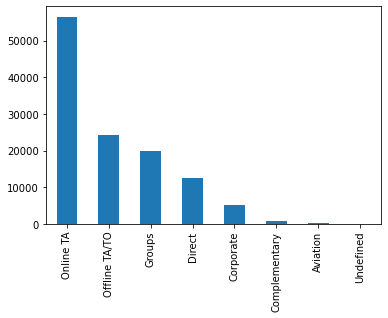

In [31]:
# Distribution of market_segments across dataset

df['market_segment'].value_counts().plot.bar()

### is_repeated_guest

In [32]:
# unique elements in this column

df['is_repeated_guest'].unique()

array([0, 1], dtype=int64)

In [33]:
df['is_repeated_guest'].value_counts(normalize = True)

0    0.968088
1    0.031912
Name: is_repeated_guest, dtype: float64

<AxesSubplot:>

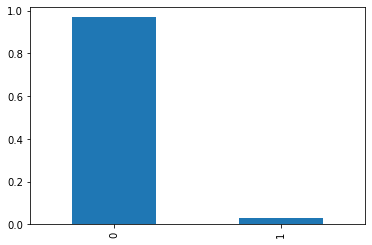

In [34]:
# How are repeated and non-repeated guests distributed

df['is_repeated_guest'].value_counts(normalize = True).plot.bar()

### reserved_room_type

In [35]:
# Unique elements in the column

df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

<AxesSubplot:>

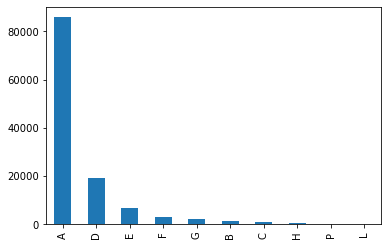

In [36]:
# How many tourists chose which room type

df['reserved_room_type'].value_counts().plot.bar()

### assigned_room_type

In [37]:
# Unique elements in the column

df['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

<AxesSubplot:>

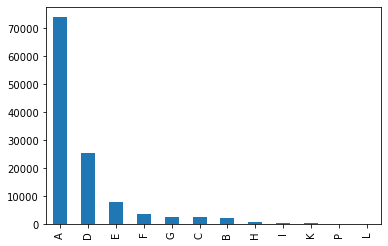

In [38]:
# How many tourists got which room

df['assigned_room_type'].value_counts().plot.bar()

### deposit_type

In [39]:
# unique elements in the column

df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

<AxesSubplot:>

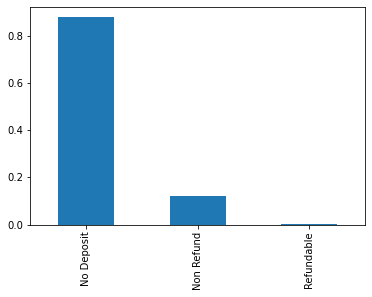

In [40]:
# Let's see the ratio of no deposit, refundable and non refund bookings

df['deposit_type'].value_counts(normalize = True).plot.bar()

### customer_type

In [41]:
# Let's check the different types of customers

df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

<AxesSubplot:>

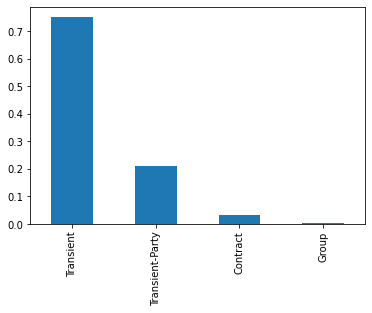

In [42]:
# Distribution of different customer types across the dataset

df['customer_type'].value_counts(normalize = True).plot.bar()

### reservation_status

In [43]:
# Let's check the types of reservation statuses

df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

<AxesSubplot:>

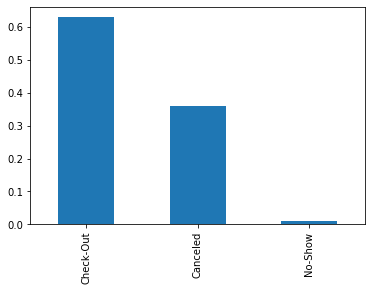

In [44]:
# Ratio of different reservation statuses

df['reservation_status'].value_counts(normalize = True).plot.bar()

## Inference from univariate analysis of Categorical Variables

**1. Hotel** - Almost 70% of the hotels are city hotels and only 30% are resorts. I would like to compare the cancellation ratios, duration of stay, the market segment that prefers these hotels, days in waiting list, types of customers visiting these hotels and whether car parking and other special requests were placed for both types.

**2. meal** - BB = Bed and Breakfast, HB = Half Board (Breakfast + Dinner), FB = Full Board (Breakfast + Lunch + Dinner), SC = Stay only. As we can see, majority of the bookings are BB. I would like to see duration of stay with different types of meal plans.

**3. market segment** - Majority of the travellers have an Online TA. The column is still too ambiguous to be commented or compared.

**4. distribution channel** - After comparing this column with market segment, if a strong relation is found, I will drop the distribution_channel column

**5. is_repeated_guest** - Hardly 3% travellers are repeated guests. I would like to check the relation between booking cancellation and guests who are repeated

**6. reserved_room_type and assigned_room_type** - A comparison of these columns can reveal how many people got the same room as they booked.

**7. deposit_type** - Majority of the bookings have no deposit. I would like to analyse the bookings that have deposit (both refundable and non-refundable) and their impact on cancellation. I would also like to analyze that how many deposit payed guests are repeat customers and wh

**8. customer_type** - This column doesnot seem to have a lot of weightage. After bivariate analysis, this column may be dropped if it doesnot have any major impact on target variable

**9. reservation_status** - Checked-out customer is the most common visitor. I am more interested in cancelled and no-show customers. Which type of hotel had maximum cancellations or no-shows, which market segment had maximum cancellations or no-shows, which time of the year had maximum and least number of cancellations and no-shows, which country saw maximum and least cancellations and no-shows, whether a cancelled or no-show booking had previous cancellations as well, did any customer with deposit cancel or no-show?

## Univariate Analysis of Numerical variables

### lead_time

C:\Users\majid\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


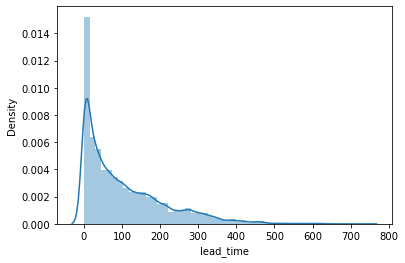

In [45]:
# Let's check the frequency distribution of lead_time

sns.distplot(df['lead_time'], label = 'lead_time')
plt.show()

### stays_in_weekend_nights

In [46]:
# Let's check the unique values in this column

df['stays_in_weekend_nights'].unique()

array([ 0,  1,  2,  4,  3,  6, 13,  8,  5,  7, 12,  9, 16, 18, 19, 10, 14],
      dtype=int64)

C:\Users\majid\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


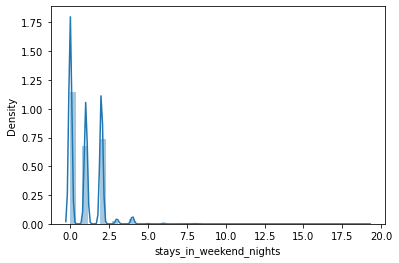

In [47]:
# Let's check the frequency distribution of stays_in_weekend_nights

sns.distplot(df['stays_in_weekend_nights'], label = 'stays_in_weekend_nights')
plt.show()

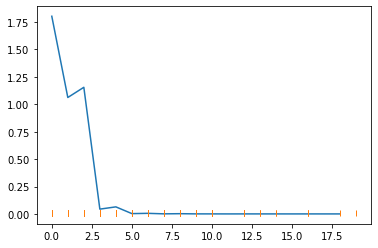

In [48]:
from scipy import stats
kdf = df['stays_in_weekend_nights'].to_numpy()
rdf = np.hstack(kdf)
density = stats.kde.gaussian_kde(rdf)
x = np.arange(0, 19, 1)
plt.plot(x, density(x))
plt.plot(rdf, [0.01]*len(rdf), '|')

In [49]:
df['stays_in_weekend_nights'].value_counts()

0     51998
2     33308
1     30626
4      1855
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64

<AxesSubplot:>

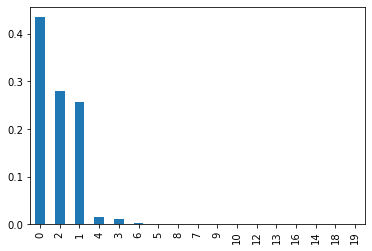

In [50]:
# Distribution of stays_in_weekend_nights

df['stays_in_weekend_nights'].value_counts(normalize = True).plot.bar()

### stays_in_week_nights

In [52]:
#Let's check the unique values in this column

print('Number of unique stays_in_week_nights:', df['stays_in_week_nights'].nunique())
df['stays_in_week_nights'].unique()

Number of unique stays_in_week_nights: 35


array([ 0,  1,  2,  3,  4,  5, 10, 11,  8,  6,  7, 15,  9, 12, 33, 20, 14,
       16, 21, 13, 30, 19, 24, 40, 22, 42, 50, 25, 17, 32, 26, 18, 34, 35,
       41], dtype=int64)

C:\Users\majid\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


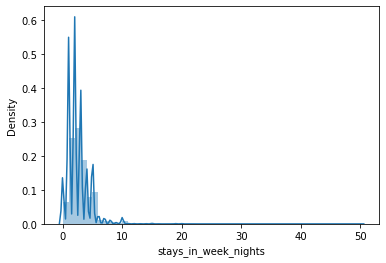

In [53]:
# Let's check the frequency distribution of stays_in_week_nights

sns.distplot(df['stays_in_week_nights'], label = 'stays_in_week_nights')
plt.show()

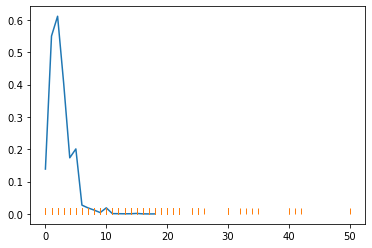

In [54]:
kdf = df['stays_in_week_nights'].to_numpy()
rdf = np.hstack(kdf)
density = stats.kde.gaussian_kde(rdf)
x = np.arange(0, 19, 1)
plt.plot(x, density(x))
plt.plot(rdf, [0.01]*len(rdf), '|')

In [55]:
# Distribution of stays_in_week_nights

df['stays_in_week_nights'].value_counts()

2     33684
1     30310
3     22258
5     11077
4      9563
0      7645
6      1499
10     1036
7      1029
8       656
9       231
15       85
11       56
19       44
12       42
20       41
14       35
13       27
16       16
21       15
22        7
18        6
25        6
30        5
17        4
24        3
40        2
26        1
32        1
33        1
34        1
35        1
41        1
42        1
50        1
Name: stays_in_week_nights, dtype: int64

<AxesSubplot:>

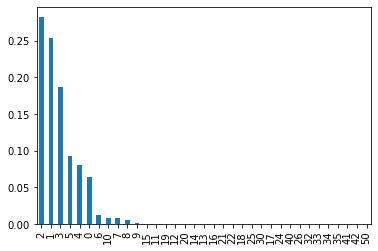

In [56]:
# Distribution of stays_in_week_nights

df['stays_in_week_nights'].value_counts(normalize = True).plot.bar()

### adults

In [57]:
# Let's check the unique values in this column

print('Number of unique number_of_adults:', df['adults'].nunique())
df['adults'].unique()

Number of unique number_of_adults: 14


array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10],
      dtype=int64)

C:\Users\majid\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


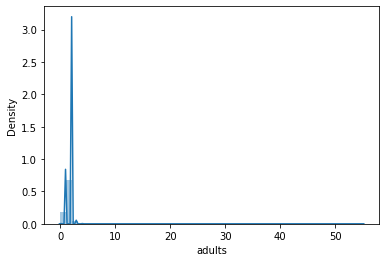

In [58]:
# Let's check the frequency distribution of adults

sns.distplot(df['adults'], label = 'adults')
plt.show()

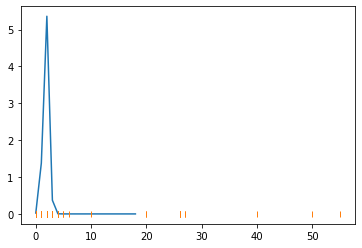

In [59]:
kdf = df['adults'].to_numpy()
rdf = np.hstack(kdf)
density = stats.kde.gaussian_kde(rdf)
x = np.arange(0, 19, 1)
plt.plot(x, density(x))
plt.plot(rdf, [0.01]*len(rdf), '|')

In [60]:
# Distribution of number of adults

df['adults'].value_counts()

2     89680
1     23027
3      6202
0       403
4        62
26        5
5         2
20        2
27        2
6         1
10        1
40        1
50        1
55        1
Name: adults, dtype: int64

### children

In [61]:
# Let's check the unique values in this column

print('Number of unique number_of_children:', df['children'].nunique())
df['children'].unique()

Number of unique number_of_children: 5


array([ 0.,  1.,  2., 10.,  3., nan])

C:\Users\majid\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


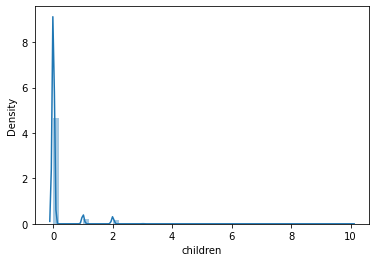

In [62]:
# Let's check the frequency distribution of children

sns.distplot(df['children'], label = 'children')
plt.show()

In [63]:
# Distribution of number of children

df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

<AxesSubplot:>

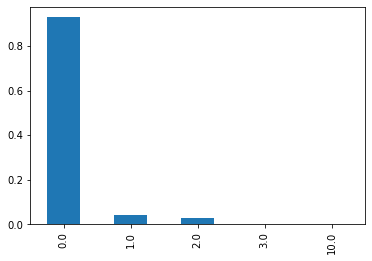

In [64]:
# Distribution of number of children

df['children'].value_counts(normalize = True).plot.bar()

### babies


In [65]:
# Let's check the unique values in this column

print('Number of unique number_of_babies:', df['babies'].nunique())
df['babies'].unique()

Number of unique number_of_babies: 5


array([ 0,  1,  2, 10,  9], dtype=int64)

C:\Users\majid\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


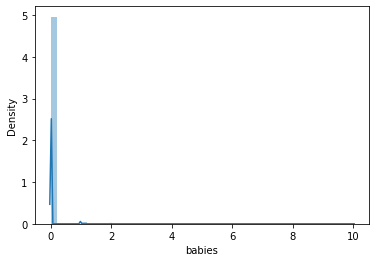

In [66]:
# Let's check the frequency distribution of babies

sns.distplot(df['babies'], label = 'babies')
plt.show()

In [67]:
# Distribution of number of babies

df['babies'].value_counts()

0     118473
1        900
2         15
9          1
10         1
Name: babies, dtype: int64

### previous_cancellations

In [68]:
# Let's check the unique values in this column

print('Number of unique previous_cancellations:', df['previous_cancellations'].nunique())
df['previous_cancellations'].unique()

Number of unique previous_cancellations: 15


array([ 0,  1,  2,  3, 26, 25, 14,  4, 24, 19,  5, 21,  6, 13, 11],
      dtype=int64)

C:\Users\majid\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


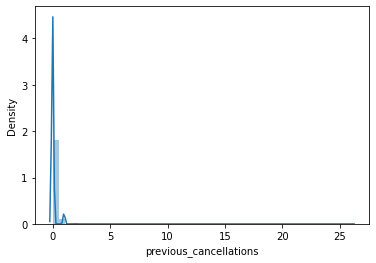

In [69]:
# Let's check the frequency distribution of previous_cancellations

sns.distplot(df['previous_cancellations'], label = 'previous_cancellations')
plt.show()

In [70]:
# Distribution of number of previous_cancellations

df['previous_cancellations'].value_counts()

0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
5         19
19        19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

<AxesSubplot:>

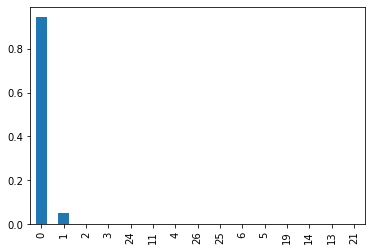

In [71]:
# Distribution of number of previous_cancellations

df['previous_cancellations'].value_counts(normalize = True).plot.bar()

### previous_bookings_not_canceled

In [72]:
# Let's check the unique values in this column

print('Number of unique previous_bookings_not_canceled:', df['previous_bookings_not_canceled'].nunique())
df['previous_bookings_not_canceled'].unique()

Number of unique previous_bookings_not_canceled: 73


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 19, 26, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72], dtype=int64)

C:\Users\majid\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


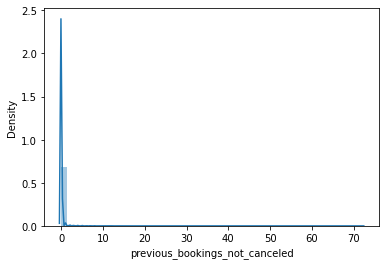

In [73]:
# Let's check the frequency distribution of previous_bookings_not_canceled

sns.distplot(df['previous_bookings_not_canceled'], label = 'previous_bookings_not_canceled')
plt.show()

In [74]:
# Distribution of number of previous_bookings_not_canceled

df['previous_bookings_not_canceled'].value_counts()

0     115770
1       1542
2        580
3        333
4        229
       ...  
38         1
39         1
71         1
41         1
63         1
Name: previous_bookings_not_canceled, Length: 73, dtype: int64

### booking_changes

In [75]:
# Let's check the unique values in this column

print('Number of unique booking_changes:', df['booking_changes'].nunique())
df['booking_changes'].unique()

Number of unique booking_changes: 21


array([ 3,  4,  0,  1,  2,  5, 17,  6,  8,  7, 10, 16,  9, 13, 12, 20, 14,
       15, 11, 21, 18], dtype=int64)

C:\Users\majid\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


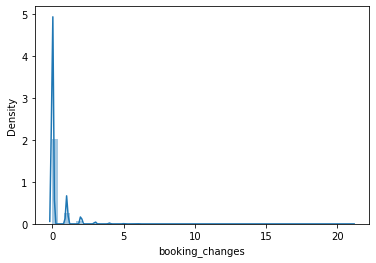

In [76]:
# Let's check the frequency distribution of booking_changes

sns.distplot(df['booking_changes'], label = 'booking_changes')
plt.show()

In [77]:
# Distribution of number of booking_changes

df['booking_changes'].value_counts()

0     101314
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
11         2
12         2
16         2
17         2
18         1
20         1
21         1
Name: booking_changes, dtype: int64

<AxesSubplot:>

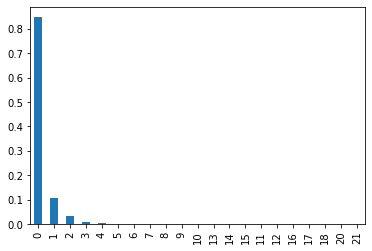

In [78]:
#Distribution of number of booking_changes

df['booking_changes'].value_counts(normalize = True).plot.bar()

### days_in_waiting_list

In [79]:
# Let's check the unique values in this column

print('Number of unique days_in_waiting_list:', df['days_in_waiting_list'].nunique())
df['days_in_waiting_list'].unique()

Number of unique days_in_waiting_list: 128


array([  0,  50,  47,  65, 122,  75, 101, 150, 125,  14,  60,  34, 100,
        22, 121,  61,  39,   5,   1,   8, 107,  43,  52,   2,  11, 142,
       116,  13,  44,  97,  83,   4, 113,  18,  20, 185,  93, 109,   6,
        37, 105, 154,  64,  99,  38,  48,  33,  77,  21,  80,  59,  40,
        58,  89,  53,  49,  69,  87,  91,  57, 111,  79,  98,  85,  63,
        15,   3,  41, 224,  31,  56, 187, 176,  71,  55,  96, 236, 259,
       207, 215, 160, 120,  30,  32,  27,  62,  24, 108, 147, 379,  70,
        35, 178, 330, 223, 174, 162, 391,  68, 193,  10,  76,  16,  28,
         9, 165,  17,  25,  46,   7,  84, 175, 183,  23, 117,  12,  54,
        26,  73,  45,  19,  42,  72,  81,  92,  74, 167,  36], dtype=int64)

C:\Users\majid\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


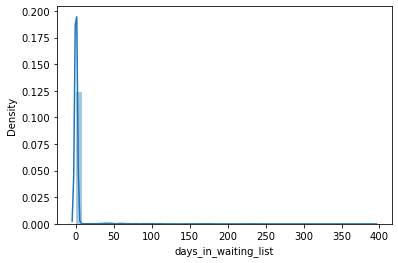

In [80]:
# Let's check the frequency distribution of days_in_waiting_list

sns.distplot(df['days_in_waiting_list'], label = 'days_in_waiting_list')
plt.show()

### adr

C:\Users\majid\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


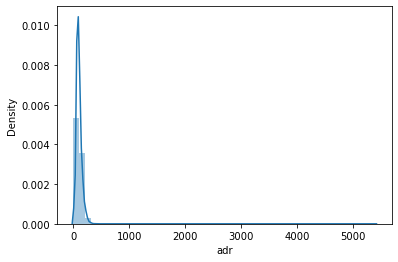

In [81]:
# Let's check the frequency distribution of adr

sns.distplot(df['adr'], label = 'adr')
plt.show()

### required_car_parking_spaces

In [82]:
# Let's check the unique values in this column

print('Number of unique required_car_parking_spaces:', df['required_car_parking_spaces'].nunique())
df['required_car_parking_spaces'].unique()

Number of unique required_car_parking_spaces: 5


array([0, 1, 2, 8, 3], dtype=int64)

C:\Users\majid\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


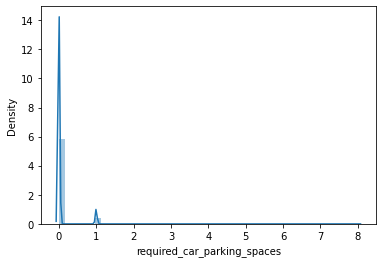

In [83]:
# Let's check the frequency distribution of required_car_parking_spaces

sns.distplot(df['required_car_parking_spaces'], label = 'required_car_parking_spaces')
plt.show()

In [84]:
# Distribution of number of required_car_parking_spaces

df['required_car_parking_spaces'].value_counts()

0    111974
1      7383
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

<AxesSubplot:>

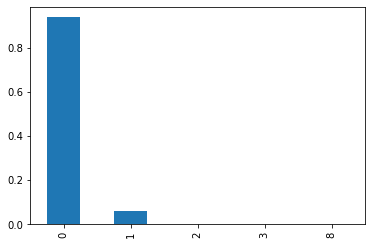

In [85]:
# Distribution of number of required_car_parking_spaces

df['required_car_parking_spaces'].value_counts(normalize = True).plot.bar()

### total_of_special_requests

In [86]:
# Let's check the unique values in this column

print('Number of unique total_of_special_requests:', df['total_of_special_requests'].nunique())
df['total_of_special_requests'].unique()

Number of unique total_of_special_requests: 6


array([0, 1, 3, 2, 4, 5], dtype=int64)

C:\Users\majid\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


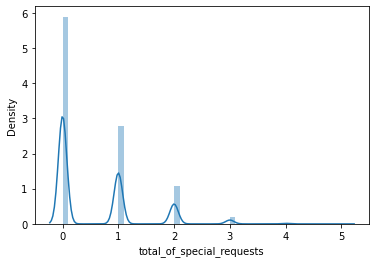

In [87]:
# Let's check the frequency distribution of total_of_special_requests

sns.distplot(df['total_of_special_requests'], label = 'total_of_special_requests')
plt.show()

In [88]:
df['total_of_special_requests'].value_counts()

0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64

<AxesSubplot:>

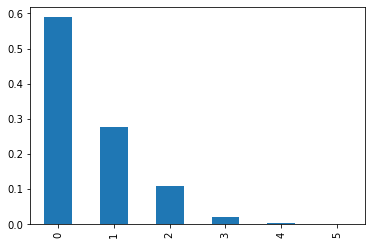

In [89]:
# Distribution of number of total_of_special_requests

df['total_of_special_requests'].value_counts(normalize = True).plot.bar()

## Inference from univariate analysis of Numerical Variables

**1. Lead Time** - Majority of the calls have a very low lead time. I would like to compare lead_time with cancellations.

**2. stays_in_weekend_nights** - Majority people had 0-2 weekend nights of stay. There are only 2 people having 18 & 19 weekend nights.

**3. stays_in_week_nights** - Majority people had 0-5 week nights of stay. There are only 10 people having more than 40 week nights.

**4. adults** - Majority bookings had 2 adults.

**5. children and babies** - Majority people travelled without children and babies.

**6. previous_cancellations** - Majority travellers had no previous cancellations. I would like to compare previous_cancellations with current booking's is_cancelled

**7. previous_bookings_not_canceled** - Majority people had zero previously uncancelled bookings. But that may be linked to is_repeated_guest

**8. booking_changes** - Very few people changed their booking more than 1 time

**9. days_in_waiting_list** - Mostly people had no waiting list. However nominal number of travellers had waiting list as high as 391 days. However, this seems to be a technical error. Ideally, no one will wait for an year for travelling

**10. adr** - Not clear

**11. required_car_parking** - Majority people didnot require car parking or required 1 car parking. 2 travellers required 8 car parkings. That is a strange request. We can check number of rooms booked, to validate this entry. However, this data is not available. Hence, this can be treated as a garbage value.

**12. total_of_special_requests** - Majority people had maximum of 2 soecial requests

## STEP-3 - Bivariate Analysis

### Bivariate Analysis of Categorical variables with is_canceled (dependent variable)

In [90]:
categorical = ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type' , 'customer_type' , 'reservation_status' ]

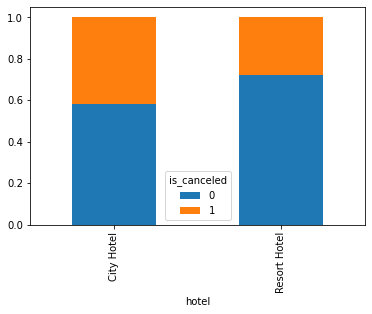

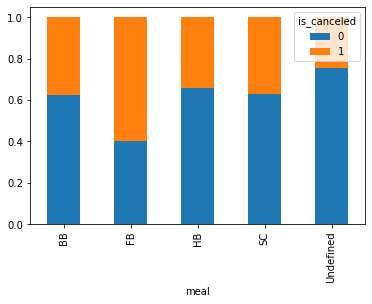

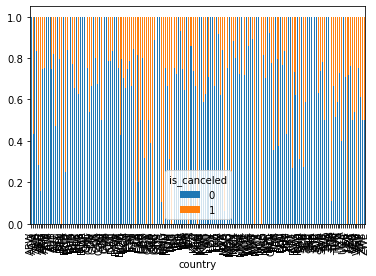

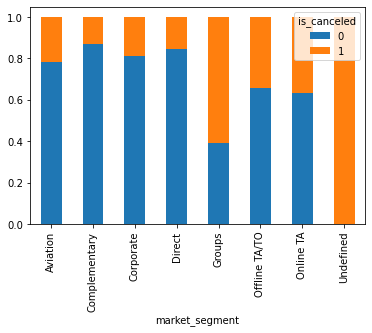

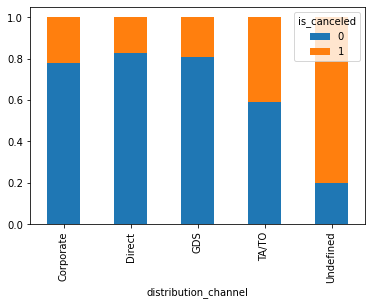

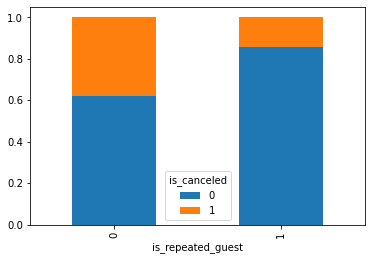

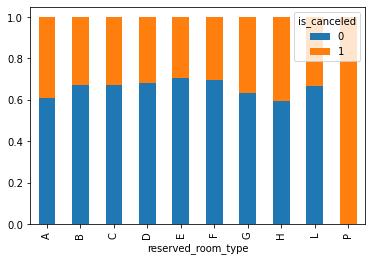

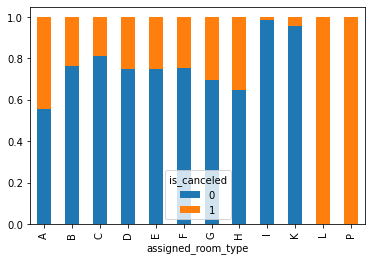

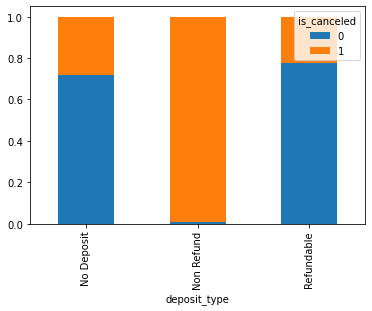

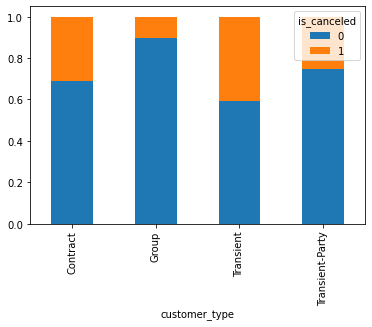

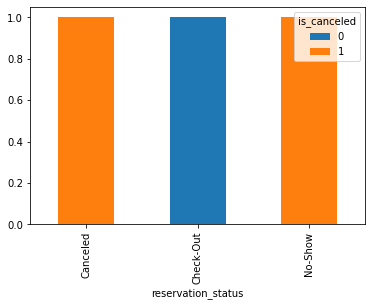

In [91]:
for item in categorical:
    plot = pd.crosstab(df[item], df['is_canceled'])
    plot.div(plot.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
    plt.show()

## Inference from Bivariate Analysis of Categorical variables with is_canceled

**1. hotel vs is_canceled** - city hotels saw almost 40% cancellations whereas resorts had almost 30% cancellations.

**2. meal vs is_canceled** - a booking with "Full Board" is more likely to get canceled.

**3. market_segment vs is_canceled** - group bookings are most likely to get canceled. Whereas Complementary, Corporate and Direct Bookings are least likely to get canceled.

**4. is_repeated_guest vs is_canceled** - a repeated guest is hardly 10% likely to cancel his booking, while a non repeated guest is 40% likely to cancel

**5. reserved_room_type vs is_canceled** - Booking for Room Type "P" will definitely get cancelled.

**6. assigned_room_type vs is_canceled** - A traveller who is assigned Room Type "L" or "P", will definitely cancel his booking. Travellers assigned Rooms "I" and "K" are least likely to cancel.

**7. deposit_type vs is_canceled** - Strangely, non-refundable bookings are almost certain to be cancelled. However, it may be noted that "non-refund" are very less compared to No Deposit bookings. The fields are highly imbalanced.

**8. reservation_status vs is_canceled** - These two fields are highly dependent. Hence, reservation_status may be dropped.

## Bivariate Analysis of Categorical variables with other independent variables

### meal vs duration_of_stay

In [92]:
df1 = df.copy()

In [93]:
df1['duration_of_stay'] = df1['stays_in_week_nights'] + df1['stays_in_weekend_nights']

In [94]:
meal_group = df1.groupby(by = 'meal')

In [95]:
mean_stay_meal = meal_group.mean()
mean_stay_meal['duration_of_stay'].head()

meal
BB           3.327440
FB           3.996241
HB           4.335200
SC           2.931737
Undefined    4.267750
Name: duration_of_stay, dtype: float64

### market_segment vs distribution_channel 

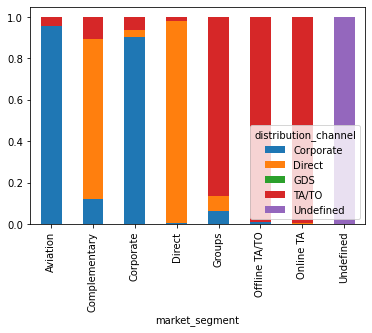

In [96]:
plot = pd.crosstab(df['market_segment'], df['distribution_channel'])
plot.div(plot.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.show()

### is_repeated_guest vs is_canceled

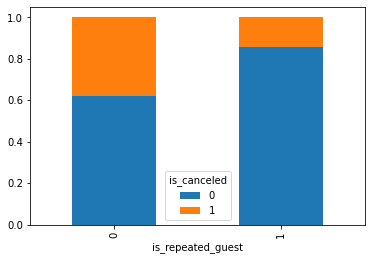

In [97]:
plot = pd.crosstab(df['is_repeated_guest'], df['is_canceled'])
plot.div(plot.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.show()

### reserved_room_type and assigned_room_type

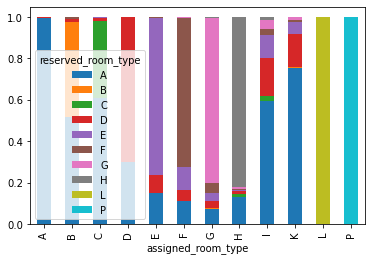

In [98]:
plot = pd.crosstab(df['assigned_room_type'], df['reserved_room_type'])
plot.div(plot.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.show()

### reservation_status vs hotel

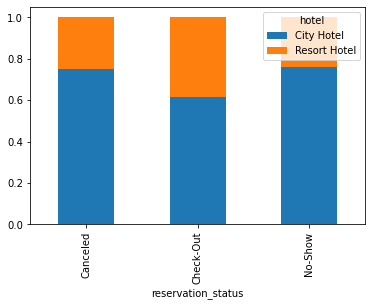

In [99]:
plot = pd.crosstab(df['reservation_status'], df['hotel'])
plot.div(plot.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.show()

### children vs babies

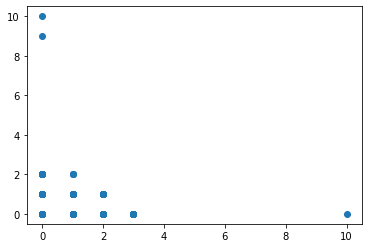

In [100]:
plt.scatter(df['children'], df['babies'])

### Inference of Bivariate Analysis of Categorical variables with other independent variables

**1. meal vs duration_of_stay** - Travellers with HB (Breakfast + Dinner) had the longest duration of stay on average

**2. market_segment vs distribution_channel** - As guessed, these two fields are highly interdependent. And hence one of the column can be dropped

**3. reserved_room_type and assigned_room_type** - Majority people got the rooms, which they had booked.

**4. reservation_status vs hotel** - Majority (approx 80%) of cancellations and no-shows were in City hotel

## Bivariate Analysis of Numerical Variables with is_cancelled (dependent variable)

### lead_time vs is_canceled


<AxesSubplot:xlabel='is_canceled', ylabel='lead_time'>

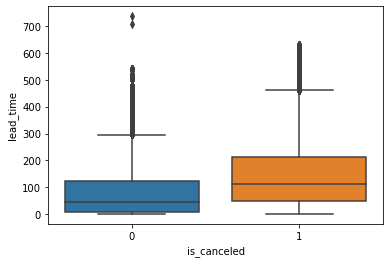

In [101]:
sns.boxplot(x = df.is_canceled, y = df.lead_time)

### previous_cancellations vs is_canceled

<AxesSubplot:xlabel='is_canceled', ylabel='previous_cancellations'>

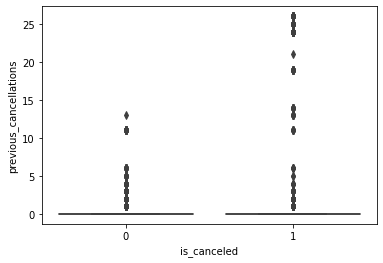

In [102]:
sns.boxplot(x = df.is_canceled, y = df.previous_cancellations)

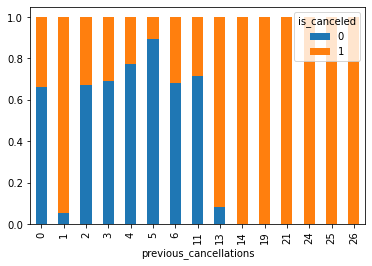

In [103]:
plot = pd.crosstab(df['previous_cancellations'], df['is_canceled'])
plot.div(plot.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.show()

## Inference from Bivariate Analysis of Numerical Variables with is_cancelled

**1. lead_time vs is_canceled** - Lead_time for canceled bookings was on an average higher than not_canceled bookings.

**2. previous_cancellations vs is_canceled** - Travellers with more than 14 cancellations in the past are certain to cancel the booking in future as well. The travellers with less than 11 cancellations in the past are less likely to cancel the booking in future.

## Bivariate Analysis of Numerical Variables with other independent variables

### hotel vs duration of stay, lead_time, days_in_waiting_list, car_parking and special_requests


In [104]:
df1 = df.copy()

In [105]:
df1['duration_of_stay'] = df1['stays_in_week_nights']+df1['stays_in_weekend_nights']

In [106]:
hotel_group = df1.groupby(by = 'hotel')

In [107]:
mean_hotel_stay = hotel_group.mean()
mean_hotel_stay.drop(columns = ['arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month',
                                'adults', 'children', 'babies',
                                'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes',
                                'agent', 'company', 'adr'], inplace = True)

mean_hotel_stay.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,duration_of_stay
hotel,,,,,,,,
City Hotel,0.417270,109.735724,0.795185,2.182957,3.226774,0.024367,0.546918,2.978142
Resort Hotel,0.277634,92.675686,1.189815,3.128732,0.527758,0.138068,0.619770,4.318547


### previous_bookings_not_canceled vs is_repeated_guest

<AxesSubplot:xlabel='is_repeated_guest', ylabel='previous_bookings_not_canceled'>

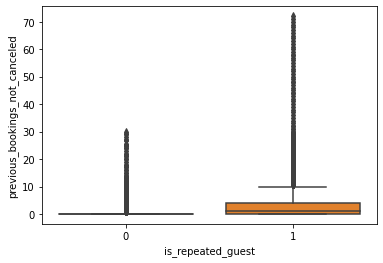

In [108]:
sns.boxplot(x = df.is_repeated_guest, y = df.previous_bookings_not_canceled)

## Inference from Bivariate Analysis of Numerical Variables with other independent variables

**1. hotel vs duration of stay** - On an average, travellers stayed for longer duration in a resort hotel compared to city hotel

**2. hotel vs lead_time** - On an average, it took longer to generate a lead for a city hotel as compared to resort.

**3. hotel vs days_in_waiting_list** - Travellers had to wait for more than 3 days on an average for a city hotel compared to hardly 0.5 day for a resort hotel.

**4. hotel vs car_parking and special_requests** - hardly any travellers requested for a car parking in general. However, it may be noted that chances of car parking request is higher in resort hotel than in a city hotel. Special Requests are also slightly higher in a resort hotel.

**5. previous_bookings_not_canceled vs is_repeated_guest** - Not clear. There are a lot of outliers.

# STEP-4 - Multivariate Analysis

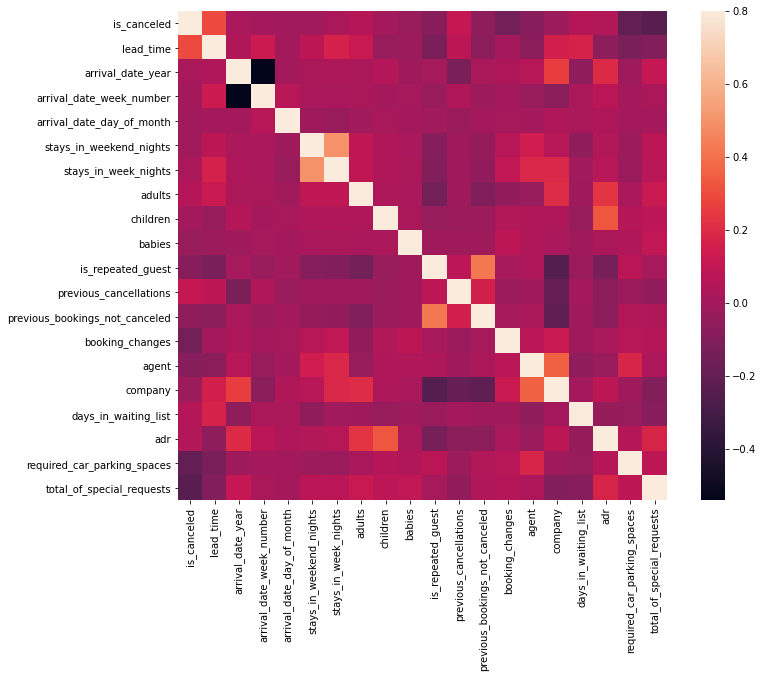

In [109]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, );

### Inference from Heatmap

Heatmap depicts that we have an ideal data at hand. None of the variables are highly correlated.

There is a correlation between "adr & children" and "adr & adults". Since the meaning of the column is not very clear and it is also not highly correlated with dependent variable, we can take the decision to drop this column.

# STEP-5 - Treating NaN values

In [111]:
# check NaN values in dataframe

df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [112]:
df.shape

(119390, 32)

In [113]:
# make a copy of original dataset

df1 = df.copy()

There are only 4 NaN values in column 'children' and 488 NaN values in column'country'. Against the total rows of 119390, these are very few and can be dropped

In [114]:
# drop rows having NaN in columns 'country' and 'children'

df1.dropna(subset = ['country', 'children'], inplace = True)
df1.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16004
company         

Meaning of the contents of this coumn is not clear. Since this column also contains NaN values, we can simply delete this column as it is not strongly affecting our target variable

In [115]:
df1['agent'].value_counts()

9.0      31959
240.0    13871
1.0       7191
14.0      3638
7.0       3539
         ...  
444.0        1
280.0        1
299.0        1
397.0        1
433.0        1
Name: agent, Length: 332, dtype: int64

In [116]:
df1.drop(columns = 'agent', inplace = True)

df1.isna().sum()


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
company                           112275
days_in_waiting_

In [117]:
df1['company'].value_counts()

40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
425.0      1
104.0      1
11.0       1
54.0       1
481.0      1
Name: company, Length: 349, dtype: int64

As was the case with column 'agent', the column 'company' is also not clear. We can thus drop this column as well

In [118]:
df1.drop(columns = 'company', inplace = True)

df1.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

# STEP-6 - Dealing with Outliers

## Column 'meal'

This column has a value 'undefined', which is hardly 1% of the total data.

As analysed in Bivariate analysis, undefined and HB (Half Board) have similar effect on cancellations.

Thus, we will replace 'undefined' with HB

In [119]:
# Make a copy of df1

df2 = df1.copy()

In [120]:
df2['meal'].replace({'Undefined' : 'HB'}, inplace = True)

In [121]:
df2['meal'].value_counts()

BB    91863
HB    15599
SC    10638
FB      798
Name: meal, dtype: int64

## Column 'lead_time'

This column had a lot of outliers. The data was skewed.

However, removing all outliers will reduce the data set size. So we will remove only the values that are extreme outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1252e670550>,
 'caps': [<matplotlib.lines.Line2D at 0x1252e670400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1252e6707c0>],
 'medians': [<matplotlib.lines.Line2D at 0x12527dd80d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12527dd8550>],
 'means': []}

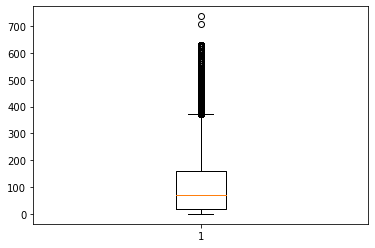

In [122]:
# Let's make a boxplot for this column

plt.boxplot(df['lead_time'])

In [123]:
# Let's check the number of rows containing lead_time greater than 650

df2[df2['lead_time'] > 650].shape

(2, 30)

In [124]:
# Save index of all rows containing lead_time greater than 650

index = df2[df2['lead_time'] > 650].index

In [125]:
# Drop rows containing lead_time greater than 650

df2.drop(index, inplace = True)

In [126]:
df2[df2['lead_time'] > 650].shape

(0, 30)

C:\Users\majid\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


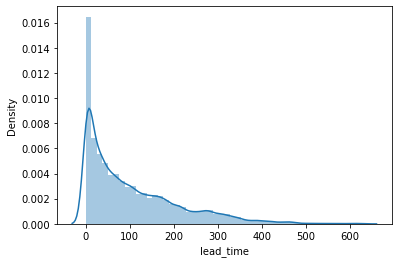

In [127]:
# Let's check the frequency distribution of lead_time

sns.distplot(df2['lead_time'], label = 'lead_time')
plt.show()

### Column 'stays_in_weekend_nights'

Majority people stayed for upto 5 weekend nights. This data is also skewed

{'whiskers': [<matplotlib.lines.Line2D at 0x1252eaf56d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1252eaf5250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1252eaf52b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1252e912700>],
 'fliers': [<matplotlib.lines.Line2D at 0x1252e912a60>],
 'means': []}

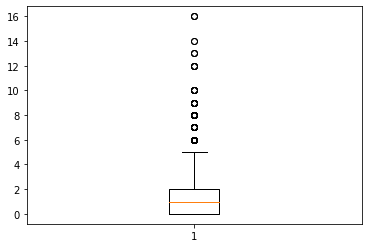

In [129]:
# Let's make a boxplot for this column

plt.boxplot(df2['stays_in_weekend_nights'])

In [130]:
# Let's check the number of rows containing stays_in_weekend_nights greater than 10

df2[df2['stays_in_weekend_nights'] > 10].shape

(13, 30)

In [131]:
# Save index of all rows containing stays_in_weekend_nights greater than 10

index_weekend_outlier = df2[df2['stays_in_weekend_nights'] > 10].index

In [132]:
# Drop rows containing stays_in_weekend_nights greater than 10

df2.drop(index_weekend_outlier, inplace = True)

In [133]:
df2[df2['stays_in_weekend_nights'] > 10].shape

(0, 30)

{'whiskers': [<matplotlib.lines.Line2D at 0x1252e634dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1252e63b4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1252e634a60>],
 'medians': [<matplotlib.lines.Line2D at 0x1252e63bb80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1252e63bee0>],
 'means': []}

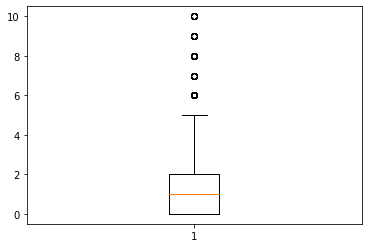

In [134]:
plt.boxplot(df2['stays_in_weekend_nights'])

### column 'stays_in_week_nights'

Majority people stayed for less than 10 week nights.

{'whiskers': [<matplotlib.lines.Line2D at 0x1252e6fe4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1252e6feb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1252e6fe190>],
 'medians': [<matplotlib.lines.Line2D at 0x1252e6d1250>],
 'fliers': [<matplotlib.lines.Line2D at 0x1252e6d1580>],
 'means': []}

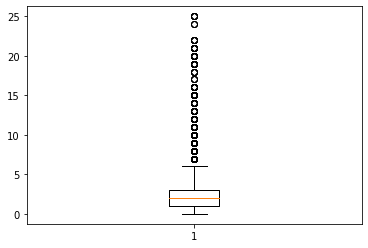

In [135]:
# Let's make a boxplot for this column

plt.boxplot(df2['stays_in_week_nights'])

In [136]:
# Let's check the number of rows containing stays_in_week_nights greater than 20

df2[df2['stays_in_week_nights'] > 20].shape

(31, 30)

In [137]:
# Save index of all rows containing stays_in_week_nights greater than 20

index_week_outlier = df2[df2['stays_in_week_nights'] > 20].index

In [138]:
# Drop rows containing stays_in_week_nights greater than 20

df2.drop(index_week_outlier, inplace = True)

In [139]:
df2[df2['stays_in_week_nights'] > 20].shape

(0, 30)

{'whiskers': [<matplotlib.lines.Line2D at 0x1252c307cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1252c302400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1252c307970>],
 'medians': [<matplotlib.lines.Line2D at 0x1252c302ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1252c302e20>],
 'means': []}

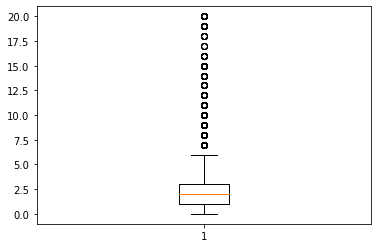

In [140]:
plt.boxplot(df2['stays_in_week_nights'])

### column 'adults'

Few bookings have number of adults as high as 55. This is not a practical scenario and such entries can be dropped.

In a practical scenario, more than 4 adults cannot stay in a room

In [141]:
# Let's check the number of bookings with more than 4 adults

df2[df2['adults'] > 4].shape

(16, 30)

In [142]:
# Save index of all rows containing adults greater than 4

index_adult_outlier = df2[df2['adults'] > 4].index

In [143]:
# Drop rows containing adults greater than 4

df2.drop(index_adult_outlier, inplace = True)


In [144]:
df2['adults'].value_counts()

2    89469
1    22719
3     6196
0      390
4       62
Name: adults, dtype: int64

### column 'children'

Some reservations have 10 number of children. Not a practical scenario in my opinion.

I would choose to drop such entries

In [145]:
# Let's check the number of bookings with more than 3 children

df2[df2['children'] > 3].shape

(1, 30)

In [147]:
# Save index of all rows containing children greater than 3

index_children_outlier = df2[df2['children'] > 3].index

In [148]:
# Drop rows containing children greater than 3

df2.drop(index_children_outlier, inplace = True)

C:\Users\majid\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


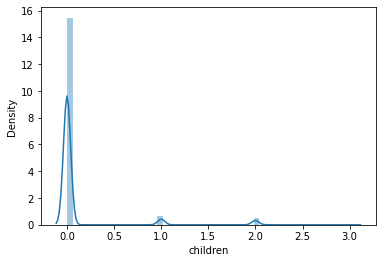

In [149]:
sns.distplot(df2['children'], label = 'children')
plt.show()

### column 'babies'

Similar to children column, this column also has certain outliers that need to be removed

In [150]:
# Let's check the number of bookings with more than or equal to 3 babies

df2[df2['babies'] >= 3].shape

(2, 30)

In [151]:
# Save index of all rows containing babies greater than or equal to 3

index_babies_outlier = df2[df2['babies'] >= 3].index

# Drop rows containing babies greater than or equal to 3

df2.drop(index_babies_outlier, inplace = True)

### column 'previous_cancellations'

Some reservations have as high as 26 previous cancellation records.

Majority reservations have less than 2 previous cancellation records

In [152]:
# Let's check the number of bookings with more than 10 previous cancellations

df2[df2['previous_cancellations'] > 10].shape

(180, 30)

In [153]:
# Save index of all rows containing previous_cancellations greater than10

index_previous_cancellations_outlier = df2[df2['previous_cancellations'] > 10].index

In [154]:
# Drop rows containing babies greater than 10

df2.drop(index_previous_cancellations_outlier, inplace = True)

In [155]:
df2['previous_cancellations'].value_counts()

0    112388
1      6015
2       113
3        65
4        31
6        22
5        19
Name: previous_cancellations, dtype: int64

### column 'previous_bookings_not_canceled'

Majority people had less than 2 previous_bookings_not_canceled

In [156]:
# Let's check the number of bookings with more than 25 previous_bookings_not_canceled

df2[df2['previous_bookings_not_canceled'] > 25].shape

(79, 30)

In [157]:
# Save index of all rows containing previous_bookings_not_canceled greater than 25

index_previous_bookings_not_canceled_outlier = df2[df2['previous_bookings_not_canceled'] > 25].index

In [158]:
# Drop rows containing previous_bookings_not_canceled greater than 25

df2.drop(index_previous_bookings_not_canceled_outlier, inplace = True)

In [159]:
df2['previous_bookings_not_canceled'].value_counts()

0     115300
1       1439
2        535
3        301
4        201
5        165
6        111
7         84
8         67
9         57
10        49
11        41
12        37
13        30
14        28
15        21
16        18
17        15
18        12
19        12
21        11
20        10
24         9
25         9
22         6
23         6
Name: previous_bookings_not_canceled, dtype: int64

### column 'booking_changes'

In [160]:
# Let's check the number of bookings with more than 10 booking_changes

df2[df2['booking_changes'] > 10].shape

(19, 30)

In [161]:
# Save index of all rows containing booking_changes greater than 10

index_booking_changes_outlier = df2[df2['booking_changes'] > 10].index

In [162]:
# Drop rows containing booking_changes greater than 10

df2.drop(index_booking_changes_outlier, inplace = True)

C:\Users\majid\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


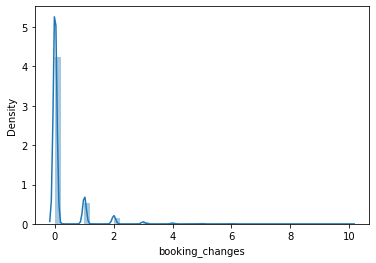

In [163]:
sns.distplot(df2['booking_changes'], label = 'booking_changes')
plt.show()

### column 'days_in_waiting_list'

In [164]:
# Let's check the number of bookings with more than 250 days_in_waiting_list

df2[df2['days_in_waiting_list'] > 250].shape

(85, 30)

In [165]:
# Save index of all rows containing days_in_waiting_list greater than 250

index_days_in_waiting_list_outlier = df2[df2['days_in_waiting_list'] > 250].index

In [166]:
# Drop rows containing days_in_waiting_list greater than 250

df2.drop(index_days_in_waiting_list_outlier, inplace = True)

C:\Users\majid\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


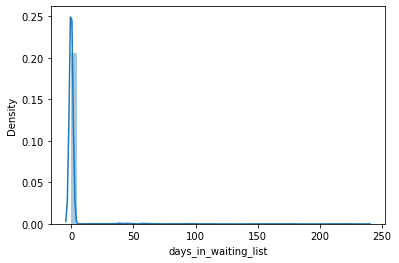

In [167]:
sns.distplot(df2['days_in_waiting_list'], label = 'days_in_waiting_list')
plt.show()

### column 'required_car_parking_spaces'

In [168]:
# Let's check the number of bookings with more than 1 required_car_parking_spaces

df2[df2['required_car_parking_spaces'] > 1].shape

(32, 30)

In [169]:
# Save index of all rows containing required_car_parking_spaces greater than 1

index_required_car_parking_spaces_outlier = df2[df2['required_car_parking_spaces'] > 1].index

In [170]:
# Drop rows containing required_car_parking_spaces greater than 1

df2.drop(index_required_car_parking_spaces_outlier, inplace = True)


C:\Users\majid\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


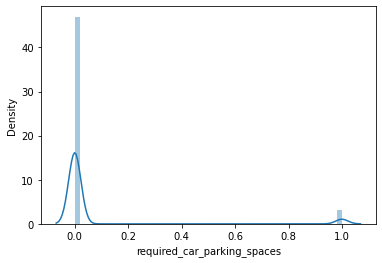

In [171]:
sns.distplot(df2['required_car_parking_spaces'], label = 'required_car_parking_spaces')
plt.show()

### Final Check

In [172]:
df2.shape

(118438, 30)